In [ ]:
!pip3 install torchvision

In [ ]:
import torch

In [ ]:
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
!git clone https://github.com/jaddoescad/ants_and_bees.git

fatal: destination path 'ants_and_bees' already exists and is not an empty directory.


In [ ]:
!ls

ants_and_bees  sample_data


In [ ]:
!ls ants_and_bees

train  val


In [ ]:
!ls ants_and_bees/train

ants  bees


In [ ]:
!ls ants_and_bees/train/ants

 0013035.jpg		     408393566_b5b694119b.jpg
 1030023514_aad5c608f9.jpg   424119020_6d57481dab.jpg
 1095476100_3906d8afde.jpg   424873399_47658a91fb.jpg
 1099452230_d1949d3250.jpg   450057712_771b3bfc91.jpg
 116570827_e9c126745d.jpg    45472593_bfd624f8dc.jpg
 1225872729_6f0856588f.jpg   459694881_ac657d3187.jpg
 1262877379_64fcada201.jpg   460372577_f2f6a8c9fc.jpg
 1269756697_0bce92cdab.jpg   460874319_0a45ab4d05.jpg
 1286984635_5119e80de1.jpg   466430434_4000737de9.jpg
 132478121_2a430adea2.jpg    470127037_513711fd21.jpg
 1360291657_dc248c5eea.jpg   474806473_ca6caab245.jpg
 1368913450_e146e2fb6d.jpg   475961153_b8c13fd405.jpg
 1473187633_63ccaacea6.jpg   484293231_e53cfc0c89.jpg
 148715752_302c84f5a4.jpg    49375974_e28ba6f17e.jpg
 1489674356_09d48dde0a.jpg   506249802_207cd979b4.jpg
 149244013_c529578289.jpg    506249836_717b73f540.jpg
 150801003_3390b73135.jpg    512164029_c0a66b8498.jpg
 150801171_cd86f17ed8.jpg    512863248_43c8ce579b.jpg
 154124431_65460430f2.jpg    518773929_7

In [ ]:
transform_train = transforms.Compose([transforms.Resize((224,224)), # VGG Model was trained on ImageNet images, which were of size (224,224). So the input images need to be resized
                                      transforms.RandomHorizontalFlip(),
                                      # transforms.RandomRotation(10),
                                      transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
                                      transforms.ColorJitter(brightness=1, contrast=1, saturation=1),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])



transform= transforms.Compose([transforms.Resize((224,224))
                               , transforms.ToTensor() , # transfor the numpy array to a float tensor
                               transforms.Normalize((0.5,), (0.5,) )])
                               # normalizes the tensor image with mean and standard deviation in the range -1, 1 from 0,1 
                               # nomralization helps reduce Skewness and distortions within out data ensuring a more effective learning process
training_dataset = datasets.ImageFolder(root= 'ants_and_bees/train',  transform= transform_train )
validation_dataset = datasets.ImageFolder(root= 'ants_and_bees/val',  transform= transform )


In [ ]:
print(len(training_dataset), len(validation_dataset))

244 153


## Training Loader

In [ ]:
# training_loader = torch.utils.data.DataLoader(training_dataset, batch_size= 100, shuffle = 
#                                             True)

### Plotting the Images

To plot the images, we need to convert the tensors back to Numpy arrays

In [ ]:
def im_convert(tensor):   # to convert the tensor into numpy arrays
  image = tensor.cpu().clone().detach().numpy()
  # tensor.detach() creates a tensor that shares storage with tensor that does not require grad 
  # It detaches the output from the computational graph
  # So no gradient will be backpropagated along this variable
  image = image.transpose(1,2,0)
  # Image is in the form of (1, 28 ,28) that is (channels, width, height)
  # We need to swap axes to convert the arrays into (28,28,1) 
  # print(image.shape)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5)) # denormalize
  image = image.clip(0,1) # clip all the values outside(0,1)
  return image

In [ ]:
# dataiter = iter(training_loader)
# images, label = dataiter.next()
# fig = plt.figure(figsize=(25,6))

# for idx in range(20):
#   ax = fig.add_subplot(2, 10, idx+1)
#   plt.imshow(im_convert(images[idx]))
#   ax.set_title(label[idx].item())

## Training Loader

In [ ]:
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size= 20, shuffle = 
                                            True)

In [ ]:
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size= 20, shuffle = 
                                            False)

In [ ]:
classes = ('ants', 'bees')

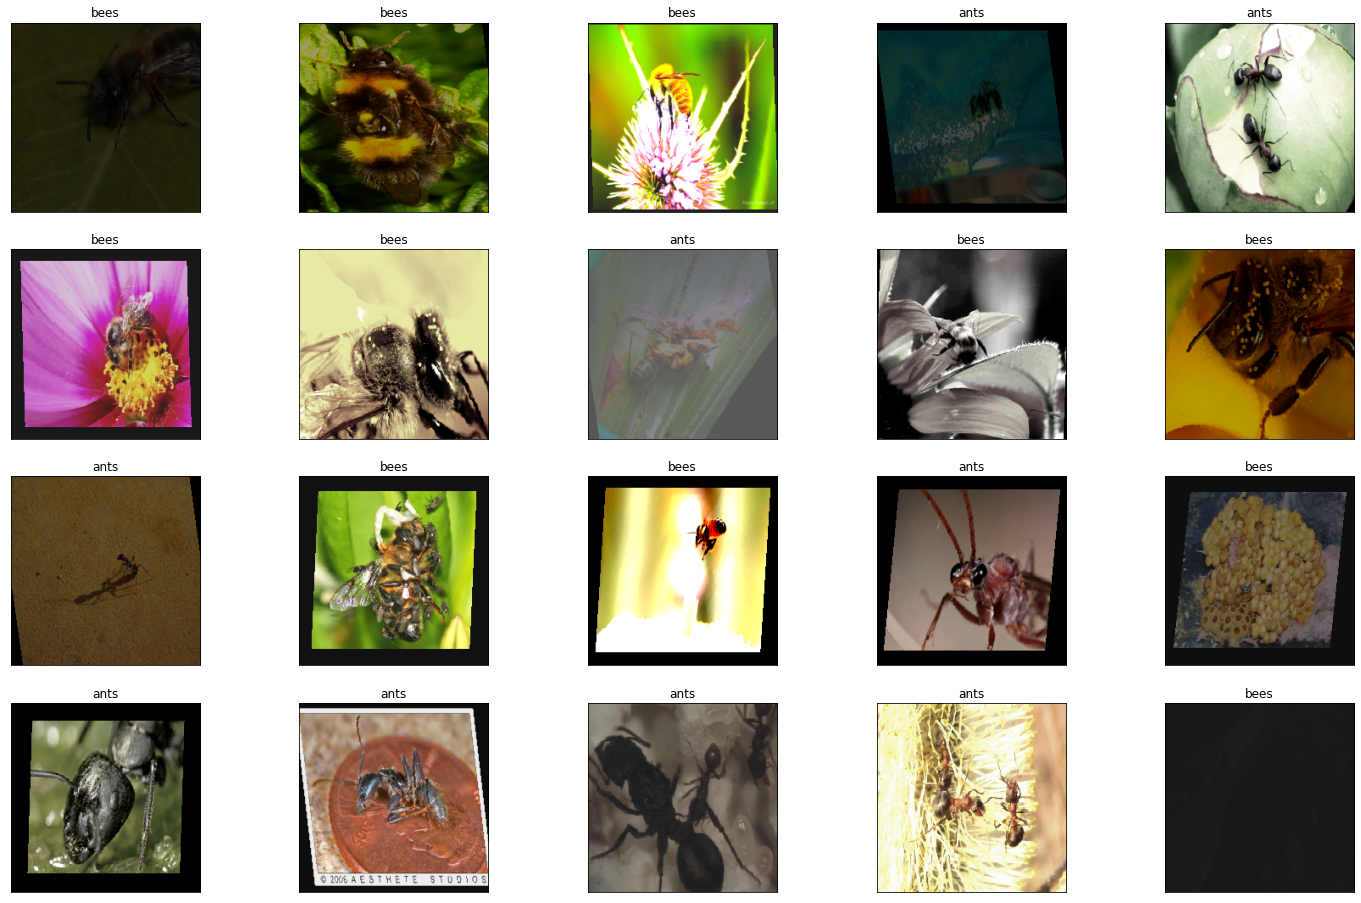

In [ ]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 16))

for idx in np.arange(20):
  ax = fig.add_subplot(4, 5, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title(classes[labels[idx].item()])

### Importing the AlexNet Model

In [ ]:
model = models.vgg16(pretrained = True)

In [ ]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
for param in model.features.parameters():
  param.requires_grad = False

In [ ]:
import torch.nn as nn

n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
model.classifier[6] = last_layer
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## Loss Function

In [ ]:
criterion = nn.CrossEntropyLoss()
# CrossEntropyLoss is a combination of log_softmax() and NLLloss()
# Used with classification models with n-classes
optimizer = torch.optim.Adam(model.parameters(), lr= 0.0001) # as the training data is small we will start with a much smaller learning rate
# ADAM optimizer, most efficient optimizer

## Training the Model

In [ ]:
epochs = 5
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device) # store the tensors in the device(GPU)
    labels = labels.to(device) # store the tensors in the device(GPU)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device) # store the tensors in the device(GPU)
        val_labels = val_labels.to(device) # store the tensors in the device(GPU)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/ len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch : 1
training loss: 0.0342, acc 0.6557 
validation loss: 0.0131, validation acc 0.9216 
epoch : 2
training loss: 0.0191, acc 0.8279 
validation loss: 0.0134, validation acc 0.8889 
epoch : 3
training loss: 0.0180, acc 0.8484 
validation loss: 0.0158, validation acc 0.8954 
epoch : 4
training loss: 0.0139, acc 0.8730 
validation loss: 0.0161, validation acc 0.9085 
epoch : 5
training loss: 0.0110, acc 0.8975 
validation loss: 0.0164, validation acc 0.9150 


## Plotting Training and Validation Losses

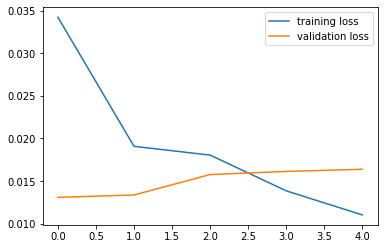

In [ ]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

## PLotting Training and Validation Accuracies

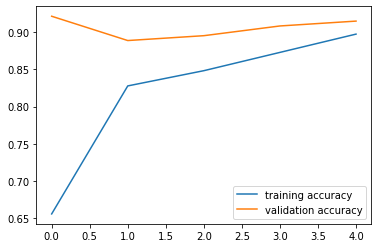

In [ ]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

## Model Testing on Dev Set

In [ ]:
# !pip3 uninstall pillow

In [ ]:
# !pip3 install pillow

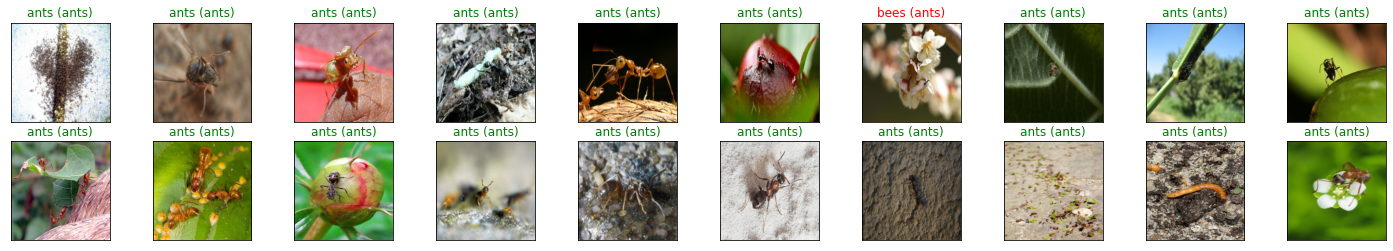

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))


## Validate the model predictions on real life data

In [ ]:
# from google.colab import files
# from io import BytesIO
# from PIL import Image
import PIL.ImageOps
# uploaded = files.upload()
# im = Image.open(BytesIO(uploaded['5.jpg']))

In [ ]:
import PIL
print(PIL.PILLOW_VERSION)

7.1.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  


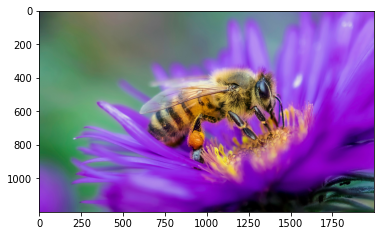

In [ ]:
import requests
from PIL import Image

url = 'https://ideas.ted.com/wp-content/uploads/sites/3/2021/03/FINAL_Bees.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

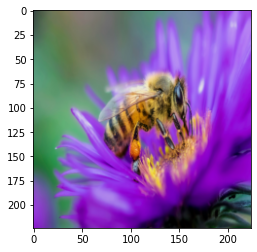

In [ ]:
# img = PIL.ImageOps.invert(img) # no need to invert 
# img = img.convert('1') # no need to conver the image inot bi level format as the model is already trained on 3 channels
img = transform(img) 
plt.imshow(im_convert(img))

In [ ]:
image = img.to(device).unsqueeze(0)
# image = images[0].unsqueeze(0).unsqueeze(0) # no need to unsqueeze
output = model(image)
_, pred = torch.max(output, 1)
print("The image is of:",classes[pred.item()])

The image is of: bees


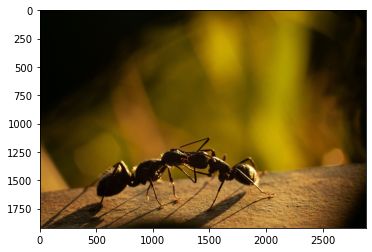

In [ ]:
url = 'https://scx2.b-cdn.net/gfx/news/hires/2021/ant.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

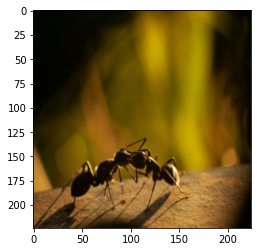

In [ ]:
# img = PIL.ImageOps.invert(img) # no need to invert 
# img = img.convert('1') # no need to conver the image inot bi level format as the model is already trained on 3 channels
img = transform(img) 
plt.imshow(im_convert(img))

In [ ]:
image = img.to(device).unsqueeze(0)
# image = images[0].unsqueeze(0).unsqueeze(0) # no need to unsqueeze
output = model(image)
_, pred = torch.max(output, 1)
print("The image is of:",classes[pred.item()])

The image is of: ants
